<div style ="border: blue solid 5px; font-family: cambria;font-size:20px;	box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);background-color: rgba(10, 10, 0, 0.5);">
<center>
<font color="white"><br><h5>--------------------------Advanced Methods in Computational Economics ----------------------</h5></font> 
    <font color="white"><br>Integral Approximation: Quadrature Method vs Monte Carlo Simulation Method applied in Mixed Logit Models</font> 
<font color="white"><br><h6>-------------------------- Written by : ----------------------</h6> </font> 
<ul>
<h4>Doulo SOW, Master in Economics IP-Paris</h4>


</ul>
<font color="white">------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font> 
</center>
    </div>

<div style ="border: blue solid 5px; font-family: cambria; 	box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 50, 50, 0.5);"><font color="black"><center><h1>-- Upoload all the packages --<br></h1> </center></font> </div>

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import numpy.linalg as la
from sieve import * 
import matplotlib.pyplot as plt
from scipy import interpolate
from numpy.polynomial import polynomial
%matplotlib inline
plt.rcParams.update({'font.size': 16})

import scipy

In [2]:
#For the interactive table of contents (hyperlink)
#Uncomment 
#!pip install jyquickhelper 

<div style ="border: blue solid 5px; font-family: cambria; 	box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 50, 50, 0.5);"><font color="black"><center><h1>-- Preliminaries --<br></h1> </center></font> </div>

In [3]:
# parameters of the taste levels beta
mean=1; sigma=2; 

Approximate the function  $g(z) = \frac{1}{1+e^{-(1+\sigma z)}}$ where z are observed from a standard normal distribution.

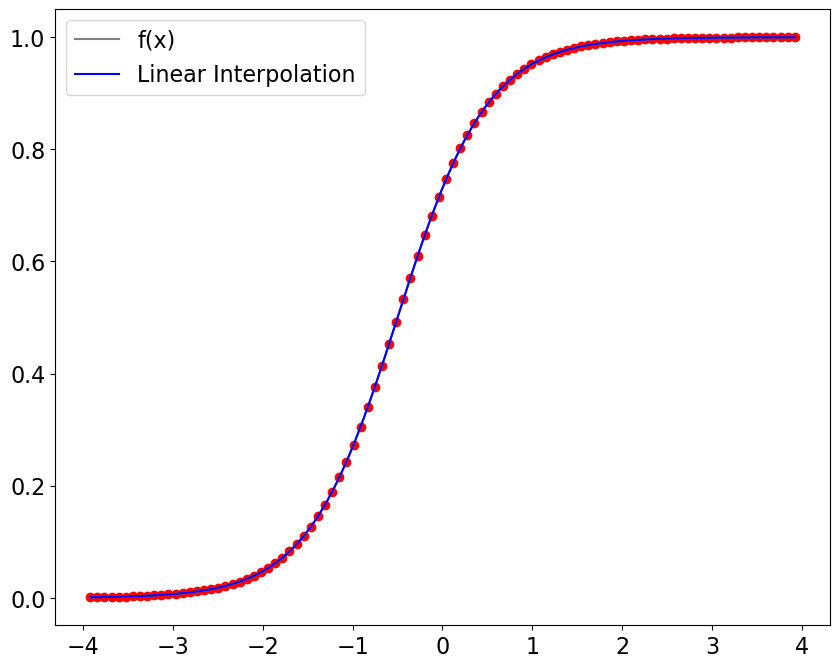

In [4]:
g1= lambda z: 1/(1+np.exp(-(mean+sigma*z)))  # function to interpolate/approximate
m=100; a=-1.96*sigma; b=1.96*sigma;            # n:   Number of datapoints and limits for on interval                         
z0 = np.linspace(a,b,m);   # x0:  grid points where we know f(x)
gx0=g1(z0)                  # fx0: function values at x0
ghat = interpolate.interp1d(z0,gx0) # returns the interpolation function
plot1d(g1, z0, gx0, ghat, label='Linear Interpolation') # use the plotting tool in sieve.py

plt.savefig('Lin.pdf', bbox_inches='tight')
plt.show()
plt.close()

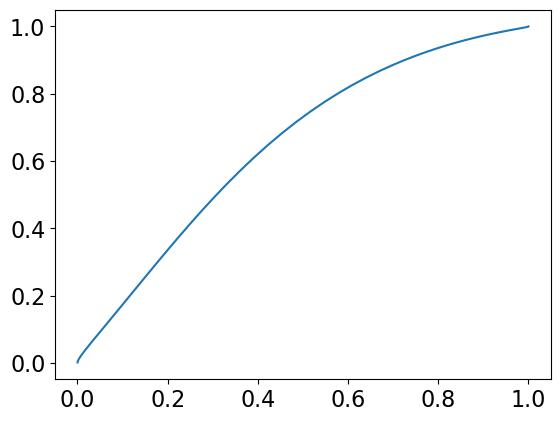

In [5]:
plt.plot(scipy.stats.norm.cdf(z0),g1(z0))
#plt.plot(scipy.stats.norm.cdf(z0),ghat(z0))

<div style ="border: blue solid 5px; font-family: cambria; 	box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 50, 50, 0.5);"><font color="black"><center><h1>Case1: Univariate Approximation<br></h1> </center></font> </div>

<div style ="border: blue solid 5px; font-family: cambria; 	box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 50, 50, 0.5);"><font color="white"><center><h3>-- Integral Approximation using Monte Carlo --<br></h3> </center></font> </div>

In [6]:
#Simulation
r = 5
R = 100
z_simr = np.random.normal(mean, sigma, r)
Y = g1(z_simr)
X = scipy.stats.norm.cdf(z_simr)

z_sim = np.random.normal(mean, sigma, R)
YR = g1(z_sim)
XR = scipy.stats.norm.cdf(z_sim)

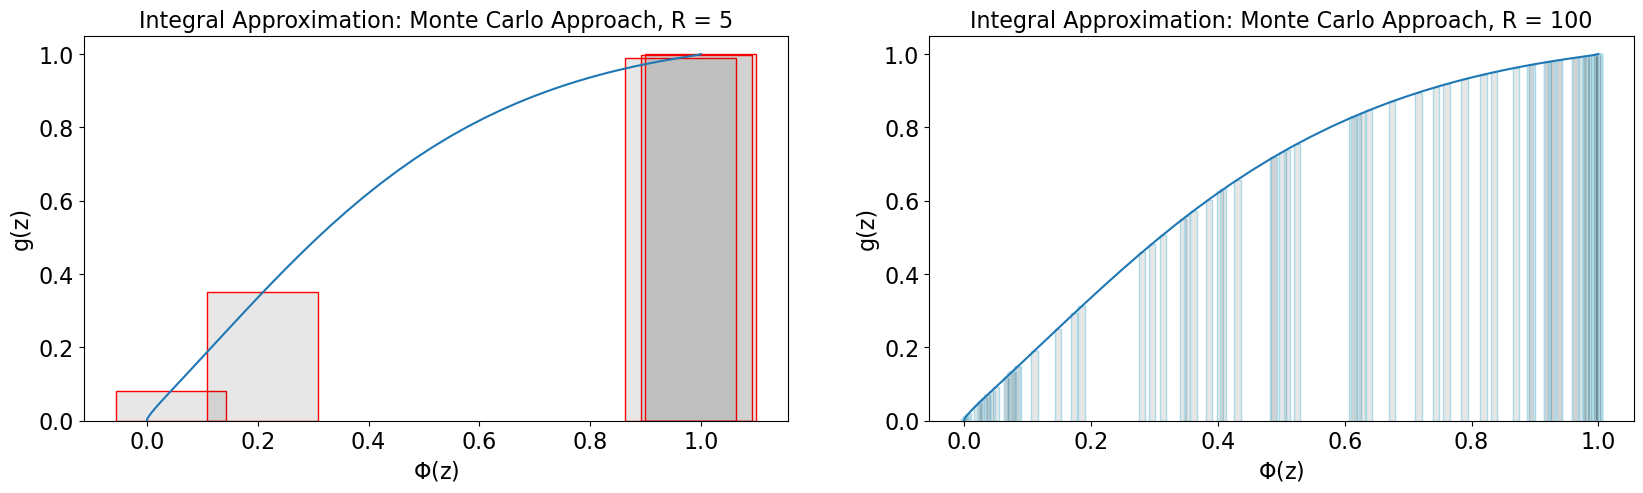

In [7]:
fig = plt.figure(figsize=(20,5))
# First subplot
ax = fig.add_subplot(1,2,1)
ax.bar(X, Y, width= 1/r, color = (0.1,0.1,0.1,0.1), edgecolor="red")
ax.plot(scipy.stats.norm.cdf(z0),g1(z0))
ax.set_ylabel('g(z)', fontsize=16)
ax.set_xlabel(r'$\Phi$(z)', fontsize=16)
ax.set_title(r'Integral Approximation: Monte Carlo Approach, R = %d'%r, fontsize=16)

ax = fig.add_subplot(1,2,2)
ax.bar(XR, YR, width= 1/R, color = (0.1,0.1,0.1,0.1), edgecolor="lightblue")
ax.plot(scipy.stats.norm.cdf(z0),g1(z0))
ax.set_ylabel('g(z)', fontsize=16)
ax.set_xlabel(r'$\Phi$(z)', fontsize=16)
ax.set_title(r'Integral Approximation: Monte Carlo Approach, R = %d'%R, fontsize=16)

plt.savefig('MCSmallR.pdf', bbox_inches='tight')
plt.show()
plt.close()

In [8]:
#The value of the integral estimated with R simulations by Monte Carlo
print('R = %d:'%R, np.mean(YR))
print('R = %d:'%r, np.mean(Y))

R = 100: 0.6518545611118466
R = 5: 0.6834802614745017


In [9]:
#Simulation
r = 500
R = 3000
z_simr = np.random.normal(mean, sigma, r)
Y = g1(z_simr)
X = scipy.stats.norm.cdf(z_simr)

z_sim = np.random.normal(mean, sigma, R)
YR = g1(z_sim)
XR = scipy.stats.norm.cdf(z_sim)

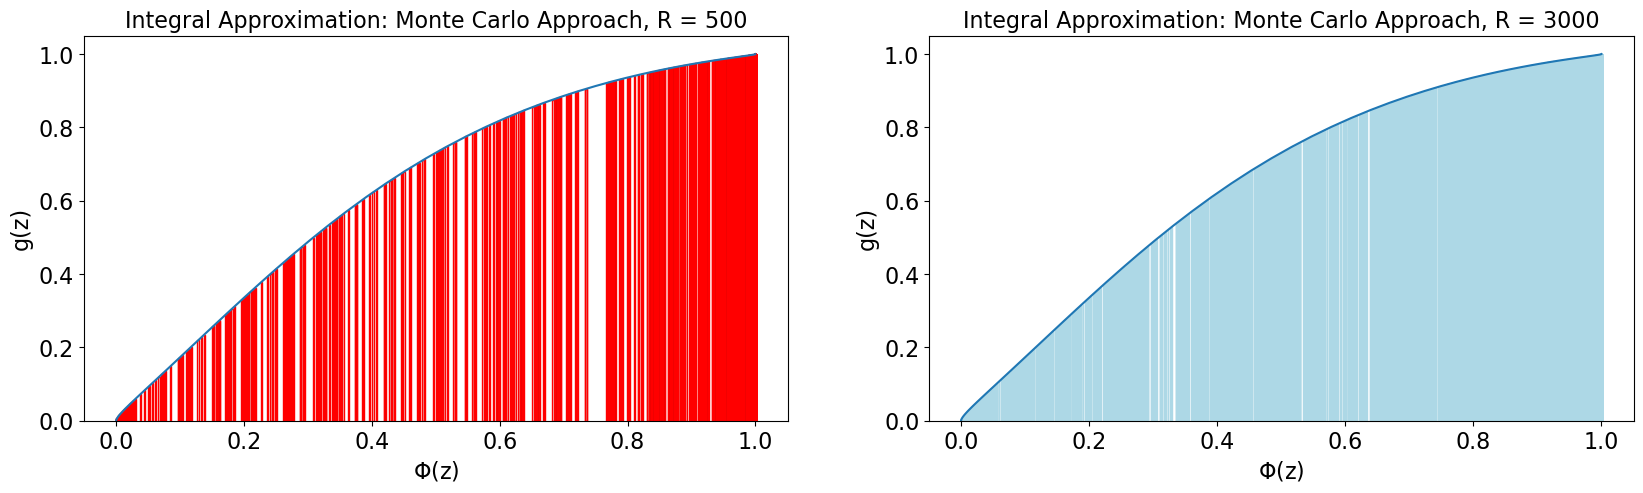

In [10]:
fig = plt.figure(figsize=(20,5))
# First subplot
ax = fig.add_subplot(1,2,1)
ax.bar(X, Y, width= 1/r, color = (0.1,0.1,0.1,0.1), edgecolor="red")
ax.plot(scipy.stats.norm.cdf(z0),g1(z0))
ax.set_ylabel('g(z)', fontsize=16)
ax.set_xlabel(r'$\Phi$(z)', fontsize=16)
ax.set_title(r'Integral Approximation: Monte Carlo Approach, R = %d'%r, fontsize=16)

ax = fig.add_subplot(1,2,2)
ax.bar(XR, YR, width= 1/R, color = (0.1,0.1,0.1,0.1), edgecolor="lightblue")
ax.plot(scipy.stats.norm.cdf(z0),g1(z0))
ax.set_ylabel('g(z)', fontsize=16)
ax.set_xlabel(r'$\Phi$(z)', fontsize=16)
ax.set_title(r'Integral Approximation: Monte Carlo Approach, R = %d'%R, fontsize=16)

plt.savefig('MCHighR.pdf', bbox_inches='tight')
plt.show()
plt.close()

In [11]:
#The value of the integral estimated with R simulations by Monte Carlo
print('R = %d:'%R, np.mean(YR))
print('R = %d:'%r, np.mean(Y))

R = 3000: 0.7703374762220783
R = 500: 0.7386674859678949


<div style ="border: blue solid 5px; font-family: cambria; 	box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 50, 50, 0.5);"><font color="white"><center><h3>-- Apply Gaussian Quadrature Method using Gauss-Hermite Quadrature --<br></h3> </center></font> </div>

### Gaussian quadrature
$$
\int_a^b f(x)w(x) dx = \sum_{i=1}^n \omega_i f(x_i) + \text{approximation error}
$$

1. Gauss-Legendre Quadrature ($w(x)=1$, domain $[a, b]$)
1. Gauss-Hermite Quadrature ($w(x)=\exp(−𝑥^2)$, domain  $[-\infty, \infty]$)
1. Gauss-Chebyshev Quadrature ($w(x)=(1-x^2)^{(-1/2)} $, domain  $[a, b]$)
1. Gauss-Laguerre Quadrature ($w(x)=\exp(−𝑥)$, domain  $[a, \infty]$)

We will look at **Gauss-Hermite Quadrature**

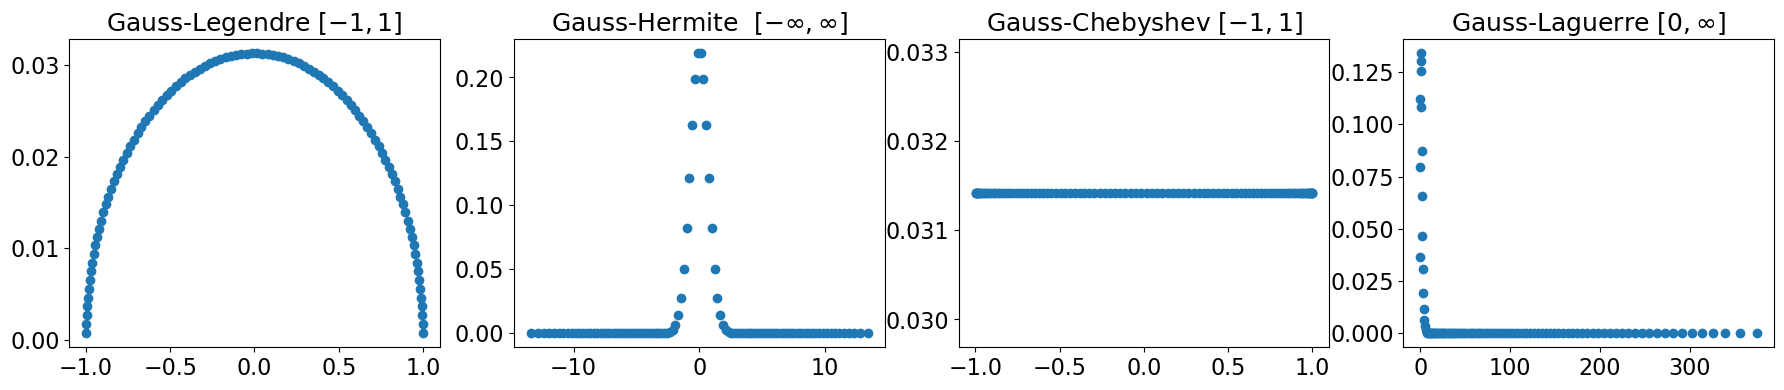

In [12]:
n=100 # number of nodes
quad_methods= [np.polynomial.legendre.leggauss, np.polynomial.hermite.hermgauss,  
              np.polynomial.chebyshev.chebgauss, np.polynomial.laguerre.laggauss]
label= ["Gauss-Legendre $[-1,1]$", "Gauss-Hermite  $[-\infty,\infty]$",  
        "Gauss-Chebyshev $[-1,1]$", "Gauss-Laguerre $[0,\infty]$"]
fig, axs = plt.subplots(1, len(label), figsize=(22,4))
for i, method in enumerate(quad_methods): 
    x, w = quad_methods[i](n)
    axs[i].scatter(x, w)
    axs[i].set_title(label[i], fontsize=18)
    
plt.savefig('Quads.pdf', bbox_inches='tight')
plt.show()
plt.close()

### Gauss-Hermite Quadrature

- Domain $ [-\infty,\infty] $  
- Weighting $ \exp(-x^2) $  


$$
\int_{-\infty}^\infty f(x) \exp(-x^2)dx = \sum_{i=1}^{n} \omega_i f(x_i) + \frac{n!\sqrt{\pi}}{2^n}\frac{f^{(2n)}(\xi)}{(2n)!}
$$

- Nodes and weights come from Hermite polynomials
- We use to approximate our integral defined as $\int_{-\infty}^{\infty} g(\mu+\sqrt{2}\sigma z)e^{-(z)^2}dz$ where $g(z) = \pi^{\frac{-1}{2}}(1+e^{-z})^{-1}$

That is:

$$
\int_{-\infty}^{\infty} g(\mu+\sqrt{2}\sigma z)e^{-(z)^2}dz\approx \sum_{i=1}^{n} \omega_i g(\sqrt{2}\sigma x_i+ \mu)
$$



In [13]:
# Quadrature rule
def quad_herm_norm(g, mean=0, sigma=1, n=10):
    #Define the nodes and weights from Hermmite
    x, w = np.polynomial.hermite.hermgauss(n)
    x = np.longdouble(x)
    #Define the argument of the function g(.)
    z=mean+np.sqrt(2)*sigma*x
    #Compute and return the integral approximation
    Q=np.sum(g(z)*w)
    return Q

In [14]:
n=4 # number of quadrature nodes
g=lambda z: 1/((np.pi**0.5)*(1+np.exp(-(mean+sigma*z)))); 
Q_herm=quad_herm_norm(g, mean, sigma, n) 
print('%-15s%20.15f\n' % ('Hermite (n = %d):'%n, Q_herm))

Hermite (n = 4):   0.729632517042685



<div style ="border: blue solid 5px; font-family: cambria; 	box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 50, 50, 0.5);"><font color="black"><center><h1>Case2: Bivariate Integral Approximation<br></h1> </center></font> </div>

<div style ="border: blue solid 5px; font-family: cambria; 	box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 50, 50, 0.5);"><font color="white"><center><h3>-- Integral Approximation using Monte Carlo --<br></h3> </center></font> </div>

## Multivariate with K=2

In this case, our integral of interest becomes:
$$
\int \int \frac{1}{1 + e^{-(z_{1}+z_{2})}}f(z;\theta)dz_{1} dz_{2}
$$


 where z is a bivariate normal distributed with mean $(\mu, \mu)'$ and cov-var matrix $\Sigma$

In [15]:
#Preliminaries: Representation
g= lambda z1, z2: 1/(1+np.exp(-(z1+z2)))
gz1Plusz2= lambda z1Plusz2: 1/(1+np.exp(-(z1Plusz2)))

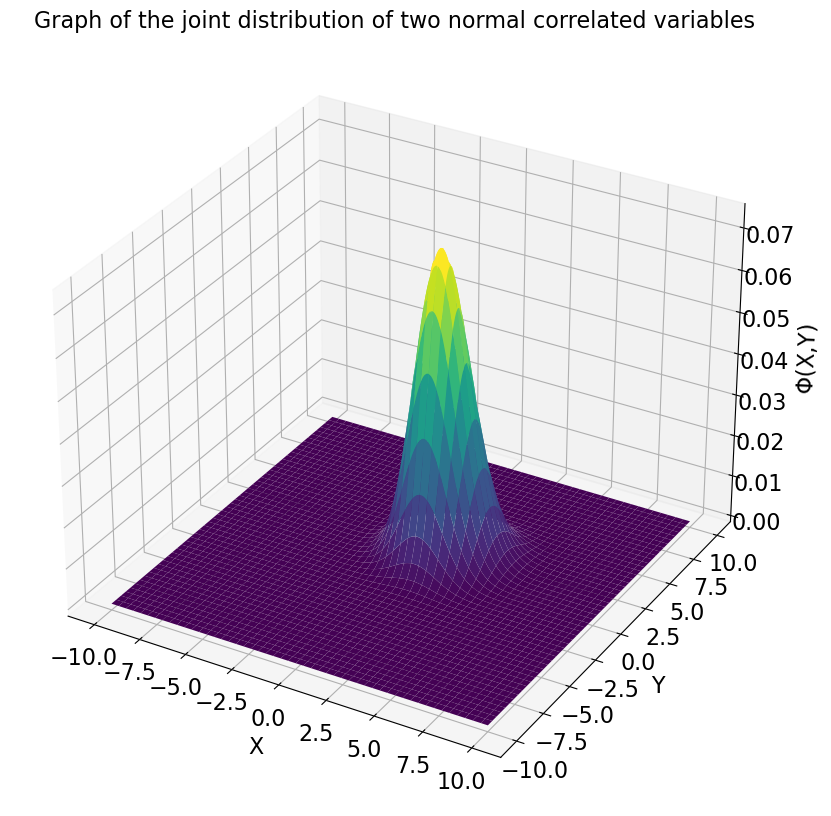

In [16]:
#!pip install ipympl
import ipympl
%matplotlib inline
#%matplotlib widget
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
#Parameter to set
rho = 0.5

#Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mean, mean], [[sigma, rho], [rho, sigma]])

#Make a 3D plot
fig = plt.figure(figsize=(40,10))
ax = plt.axes(projection ='3d')

ax.plot_surface(X, Y, g(X, Y)*rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('\nX')
ax.set_ylabel('\nY')
ax.set_zlabel('\n'r'$\Phi$(X,Y)')
ax.set_title('Graph of the joint distribution of two normal correlated variables', fontsize=16)

plt.savefig('BIVNormal.pdf', bbox_inches='tight')
plt.show()
plt.close()

In [17]:
#Monte Carlo
def mt(R, mean, sigma, rho):
    multinorm = np.random.multivariate_normal([mean, mean], [[sigma, rho], [rho, sigma]], R)
    return sum([gz1Plusz2(sum(l)) for l in multinorm])/R

In [18]:
mt(2000, mean, sigma, rho)

0.769445067845577

In [19]:
R=1000
Rloop= [x+1 for x in range(R)]
mtLoop = [mt(x, mean, sigma, rho) for x in Rloop]

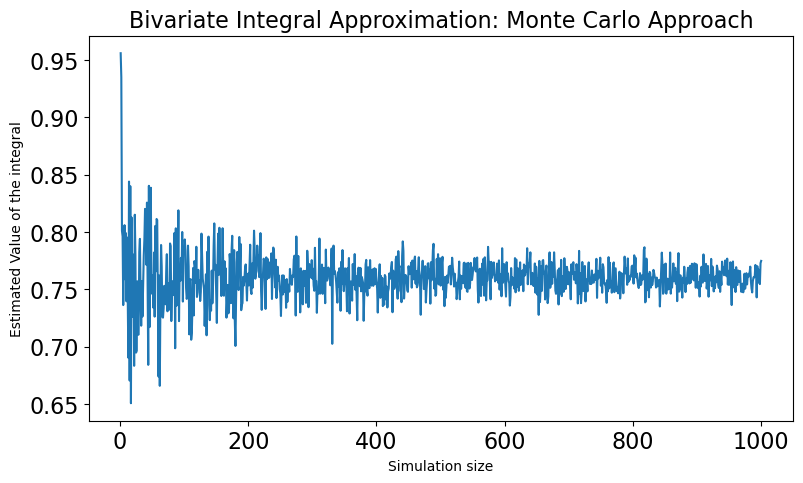

In [20]:
#With correation between the variables
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,2,1)
ax.plot(Rloop,mtLoop )
ax.set_ylabel('Estimated Value of the integral', fontsize=10)
ax.set_xlabel('Simulation size', fontsize=10)
ax.set_title('Bivariate Integral Approximation: Monte Carlo Approach', fontsize=16)

plt.savefig('MC_BivCor.pdf', bbox_inches='tight')
plt.show()
plt.close()

<div style ="border: blue solid 5px; font-family: cambria; 	box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 50, 50, 0.5);"><font color="white"><center><h3>--  Bivavariate Integral Using Approximation  Gauss-Hermite Quadrature --<br></h3> </center></font> </div>

### Bivavariate Gauss-Hermite Quadrature

- Domain $ [-\infty,\infty] $  
- Weighting $ \exp(-x^2) $  

The function is given by: 

The Integral can be approximated by $\sum_{i=1}^{n}\sum_{j=1}^{n} \omega_i\omega_j g(z_i, \rho z_i + \sqrt{(1-\rho^{2})}z_j)$


See Peter Jackel, 2005 for details.
However, due to some limitations of the library chaospy I use, I will consider that these to variables are independent i.e $\rho=0$. In fact, rules that directly is built on properties taken from the distributions, and in particular, those assuming stochastic independence, can not work with chaospy.generate_quadrature when creating quadrature nodes and weights (See:https://chaospy.readthedocs.io/en/master/user_guide/advanced_topics/stochastic_dependencies.html)

In [ ]:
import chaospy

In [ ]:
g= lambda z1, z2: 1/(1+np.exp(-(z1+z2)))
def quad(f, size=R, a=-np.inf, b=np.inf):
    #Define the distribution
    distribution = chaospy.MvNormal([mean, mean], [[sigma, 0], [0, sigma]])
    x0, w0 = chaospy.generate_quadrature(size, distribution)
    #Define the argument of the function g(.)
    #Compute and return the integral approximation
    Q=np.sum(f(x0[0],x0[1])*w0)
    return Q

In [ ]:
quad(g, size=R)

In [ ]:
qdLoop = [quad(g, size=x) for x in Rloop]

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,2,1)

ax.plot(Rloop,qdLoop)

ax.set_ylabel('Estimated Value of the integral', fontsize=16)
ax.set_xlabel('Simulation size', fontsize=16)
ax.set_title(r'Bivariate Integral Approximation: Quadrature Method', fontsize=16)

plt.savefig('Quad_Biv.pdf', bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
#Comparing it to the approximation made with Monte Carlo and assuming no correlation between the variables. 
#We see that the convergence is more rapid with the aquadrqture method
Rloop= [x+1 for x in range(R)]
mtLoop = [mt(x, mean, sigma, 0) for x in Rloop]

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,2,1)
ax.plot(Rloop,mtLoop )
ax.set_ylabel('Estimated Value of the integral', fontsize=16)
ax.set_xlabel('Simulation size', fontsize=16)
ax.set_title('Bivariate (not correlated) Integral Approximation: Monte Carlo Approach', fontsize=16)

plt.savefig('MC_BivNoCor.pdf', bbox_inches='tight')
plt.show()
plt.close()


<center><div style ="border: red solid 2px; font-family: Agency FB; box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 0, 0, 0.5);"><center>
<h1>END</h1> </div>   
</center>